# Data Analysis Notebook

This notebook is designed for the purpose of analyzing data obtained from the Hydra cluster. It provides a set of tools and techniques for performing data analysis tasks and extracting insights from the data.


In [24]:
Sys.CPU_THREADS

6

In [25]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("../AdditionalStructure/NewTypes.jl")
include("../AdditionalStructure/BitStringOps.jl")
include("../AdditionalStructure/Measurements.jl")
include("../AdditionalStructure/MICModels.jl")
include("../AdditionalStructure/ModelRuns.jl")
include("../AdditionalStructure/HelperTools.jl")
include("../AdditionalStructure/Iterators.jl");

exp_index = 1
dir_extension = ""
file_prefix = ""
filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
data = h5read(filename, "/")

for key in keys(data)
    println("$key: $(data[key])")
end


n_t: 5
exp_index: 1
p_f_max: 1.0
n_subdiv: 12
TEE: [2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 3.0 2.0 3.0 1.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 3.0 3.0 4.0 3.0 4.0 3.0 4.0 3.0 2.0 4.0 2.0 4.0 4.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0 2.0 4.0 2.0 3.0 2.0 3.0 3.0 2.0 2.0 2.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 1.0 4.0 2.0 3.0 2.0 2.0 3.0 2.0 3.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 1.0 2.0 3.0 3.0 3.0 3.0 2.0 2.0 2.0 2.0 3.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 1.0 3.0 2.0 2.0 2.0 4.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 1.0 2.0 1.0 3.0 1.0 2.0 2.0 2.0 2.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 2.0 3.0 4.0 2.0 2.0 2.0 1.0 2.0 2.0 3.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 0.0 2.0 2.0 3.0 1.0 2.0 2.0 2.0 1.0 3.0 3.0; 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 3.0 3.0 2.0 3.0 2.0 3.0 1.0 3.0 1.0 1.0 3.0 3.0 2.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 3.0 1.0 1.0 2.0 2.0; 2.0 2.0 2.0 2

Excessive output truncated after 570874 bytes.

In [26]:
length(data["TEE"][:,1,1])

15

In [27]:
dir_extension = ""
file_prefix = ""
all_data = []
for exp_index in 1:400
    filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
    if ispath(filename)
        data = h5read(filename, "/")
        # print(data["L"],",")
        push!(all_data, data)
    end
end
print("data sets read: ",length(all_data))

In [28]:
avr_back = 12

Observables_t_p  = []
# model_data = all_data[4]
for data in all_data
    if data["L"] == 15
        for i in 1:avr_back
            push!(Observables_t_p, data["TEE"][end+1-i, :, :])
        end
    end
end
Observables_t_p_15  = cat(dims= 3, Observables_t_p...) # implement time averaging

Observables_t_p  = []
# model_data = all_data[1]
for data in all_data
    if data["L"] == 18
        for i in 1:avr_back
            push!(Observables_t_p, data["TEE"][end+1-i, :, :])
        end
    end
end
Observables_t_p_18  = cat(dims= 3, Observables_t_p...)

# Observables_t_p  = []
# model_data = all_data[1]
# for data in all_data
#     if data["L"] == 21
#         push!(Observables_t_p, data["TEE"][:, :, :])
#     end
# end
# Observables_t_p_21  = cat(dims= 4, Observables_t_p...)

# Observables_t_p  = []
# model_data = all_data[1]
# for data in all_data
#     if data["L"] == 24
#         push!(Observables_t_p, data["TEE"][:, :, :])
#     end
# end
# Observables_t_p_24  = cat(dims= 4, Observables_t_p...);

TEE_dict = Dict(
    "L15" => Observables_t_p_15,
    "L18" => Observables_t_p_18,
    #"L21" => Observables_t_p_21,
    #"L24" => Observables_t_p_24
)

TEE_means = Dict(
    "L15" => mean(TEE_dict["L15"], dims = 3),
    "L18" => mean(TEE_dict["L18"], dims = 3),
    #"L21" => mean(TEE_dict["L21"], dims = 4),
    #"L24" => mean(TEE_dict["L24"], dims = 4)
)

TEE_vars = Dict(
    "L15" => var(TEE_dict["L15"], dims = 3),
    "L18" => var(TEE_dict["L18"], dims = 3),
    #"L21" => var(TEE_dict["L21"], dims = 4),
    #"L24" => var(TEE_dict["L24"], dims = 4)
)

TEE_err = Dict(
    "L15" => std(TEE_dict["L15"], dims = 3) ./ sqrt(size(TEE_dict["L15"], 3)),
    "L18" => std(TEE_dict["L18"], dims = 3) ./ sqrt(size(TEE_dict["L18"], 3)),
    #"L21" => std(TEE_dict["L21"], dims = 4) ./ sqrt(size(TEE_dict["L21"], 4)),
    #"L24" => std(TEE_dict["L24"], dims = 4) ./ sqrt(size(TEE_dict["L24"], 4))
)

TEE_medians = Dict(
    "L15" => median(TEE_dict["L15"], dims = 3),
    "L18" => median(TEE_dict["L18"], dims = 3),
    #"L21" => median(TEE_dict["L21"], dims = 4),
    #"L24" => median(TEE_dict["L24"], dims = 4)
)

TEE_Stats = Dict(
    "mean" => TEE_means,
    "var" => TEE_vars,
    "err" => TEE_err,
    "median" => TEE_medians
)

Dict{String, Dict{String, Array{Float64, 3}}} with 4 entries:
  "median" => Dict("L15"=>[2.0 2.0 … 0.0 0.0; 2.0 2.0 … 0.0 NaN; … ; 2.0 0.0 … …
  "err"    => Dict("L15"=>[0.0 0.00166736 … 0.0 0.0; 0.0 0.00235751 … 0.0 NaN; …
  "mean"   => Dict("L15"=>[2.0 2.0 … 0.0 0.0; 2.0 1.99833 … 0.0 NaN; … ; 2.3658…
  "var"    => Dict("L15"=>[0.0 0.00333611 … 0.0 0.0; 0.0 0.00666945 … 0.0 NaN; …

In [29]:
model_data = all_data[4]

Dict{String, Any} with 19 entries:
  "n_t"          => 5
  "exp_index"    => 5
  "p_f_max"      => 1.0
  "n_subdiv"     => 12
  "TEE"          => [2.0 2.0 … 3.0 3.0; 2.0 2.0 … 2.0 2.0; … ; 2.0 2.0 … 1.0 2.…
  "sys_type"     => "Init_EdgeSquareLattice_KitaevDoNuT"
  "L"            => 18
  "subdiv_array" => [2, 3, 4, 6, 8, 9, 10, 12, 14, 15, 16]
  "t_final"      => 20000
  "EE_cut"       => [35.0 35.0 … 50.0 51.0; 35.0 36.0 … 49.0 50.0; … ; 35.0 35.…
  "t_mmt"        => [1, 12, 141, 1682, 3364, 5046, 6728, 8410, 10092, 11774, 13…
  "p_b_max"      => 1.0
  "n_pf"         => 21
  "p_b_arr"      => [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  …
  "filename"     => "/mnt/users/jovanovic/GitHub/Subsystem-Code-Physics/Remote-…
  "n_pb"         => 21
  "p_f_arr"      => [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  …
  "n_t_new"      => 15
  "d"            => 3

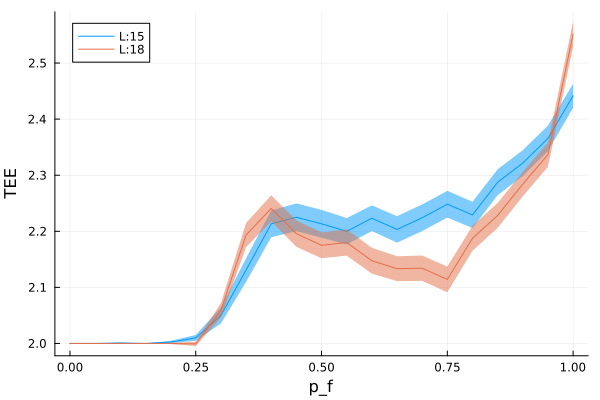

In [30]:
stat = "mean"
ribbon = "err"

plot(model_data["p_f_arr"], TEE_Stats[stat]["L15"][:, 1], ribbon=TEE_Stats[ribbon]["L15"][:, 1], label="L:$(15)", xlabel="p_f", ylabel="TEE", legend=:topleft) 
plot!(model_data["p_f_arr"], TEE_Stats[stat]["L18"][:, 1], ribbon=TEE_Stats[ribbon]["L18"][:, 1], label="L:$(18)", xlabel="p_f", ylabel="TEE", legend=:topleft) 
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L21"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L24"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


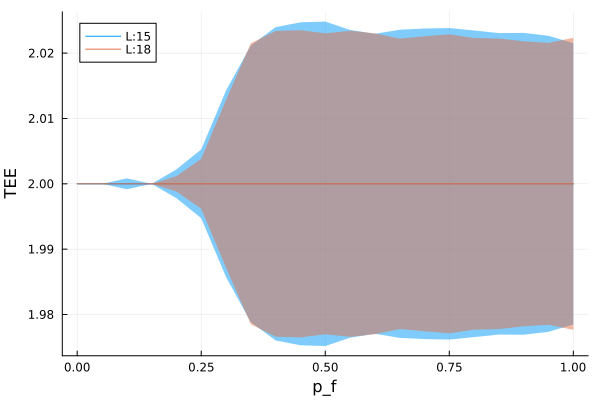

In [31]:
stat = "median"
ribbon = "err"

plot(model_data["p_f_arr"], TEE_Stats[stat]["L15"][:, 1], ribbon=TEE_Stats[ribbon]["L15"][:, 1], label="L:$(15)", xlabel="p_f", ylabel="TEE", legend=:topleft) 
plot!(model_data["p_f_arr"], TEE_Stats[stat]["L18"][:, 1], ribbon=TEE_Stats[ribbon]["L18"][:, 1], label="L:$(18)", xlabel="p_f", ylabel="TEE", legend=:topleft) 
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L21"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L24"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


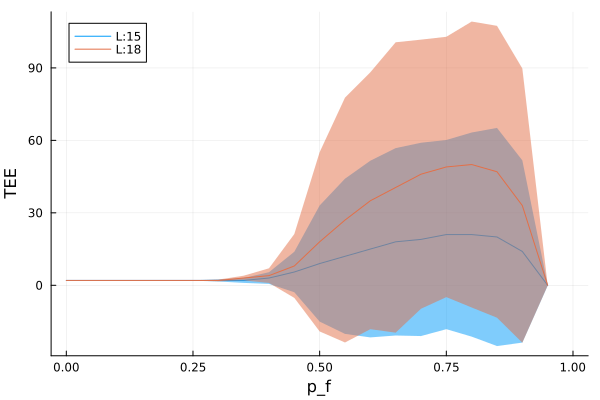

In [32]:
stat = "median"
ribbon = "var"
p_b_ind = 2

plot(model_data["p_f_arr"], TEE_Stats[stat]["L15"][:, p_b_ind], ribbon=TEE_Stats[ribbon]["L15"][:, p_b_ind], label="L:$(15)", xlabel="p_f", ylabel="TEE", legend=:topleft) 
plot!(model_data["p_f_arr"], TEE_Stats[stat]["L18"][:, p_b_ind], ribbon=TEE_Stats[ribbon]["L18"][:, p_b_ind], label="L:$(18)", xlabel="p_f", ylabel="TEE", legend=:topleft) 
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L21"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L24"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


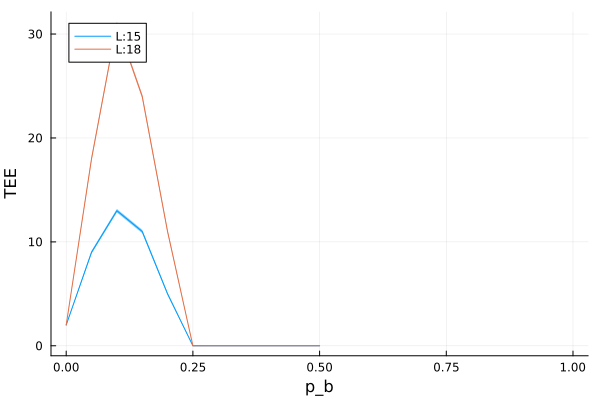

In [33]:
p_f_cut = 11
stat = "median"
ribbon = "err"

plot(model_data["p_b_arr"], TEE_Stats[stat]["L15"][p_f_cut, :], ribbon=TEE_Stats[ribbon]["L15"][p_f_cut, :], label="L:$(15)", xlabel="p_b", ylabel="TEE", legend=:topleft) 
plot!(model_data["p_b_arr"], TEE_Stats[stat]["L18"][p_f_cut, :], ribbon=TEE_Stats[ribbon]["L18"][p_f_cut, :], label="L:$(18)", xlabel="p_b", ylabel="TEE", legend=:topleft) 
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L21"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, p_f_cut, :], label="L:$(21)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L24"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, p_f_cut, :], label="L:$(24)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


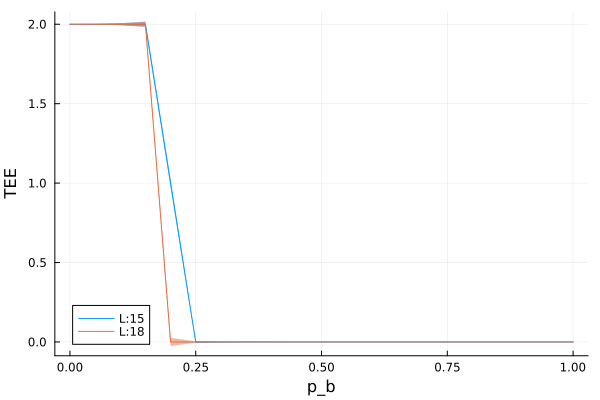

In [34]:
p_f_cut = 1
stat = "median"
ribbon = "err"

plot(model_data["p_b_arr"], TEE_Stats[stat]["L15"][p_f_cut, :], ribbon=TEE_Stats[ribbon]["L15"][p_f_cut, :], label="L:$(15)", xlabel="p_b", ylabel="TEE", legend=:bottomleft) 
plot!(model_data["p_b_arr"], TEE_Stats[stat]["L18"][p_f_cut, :], ribbon=TEE_Stats[ribbon]["L18"][p_f_cut, :], label="L:$(18)", xlabel="p_b", ylabel="TEE", legend=:bottomleft) 
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L21"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, p_f_cut, :], label="L:$(21)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L24"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, p_f_cut, :], label="L:$(24)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


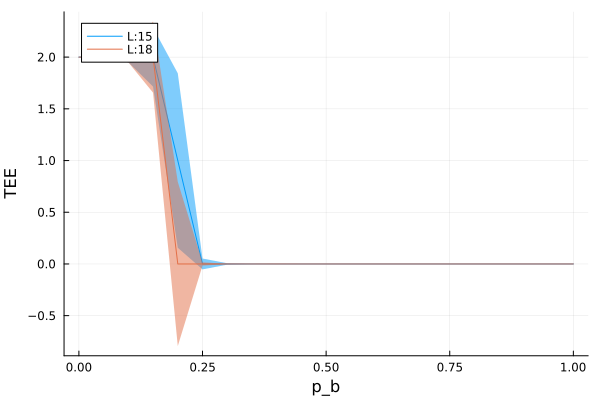

In [35]:
p_f_cut = 1
stat = "median"
ribbon = "var"

plot(model_data["p_b_arr"], TEE_Stats[stat]["L15"][p_f_cut, :], ribbon=TEE_Stats[ribbon]["L15"][p_f_cut, :], label="L:$(15)", xlabel="p_b", ylabel="TEE", legend=:topleft) 
plot!(model_data["p_b_arr"], TEE_Stats[stat]["L18"][p_f_cut, :], ribbon=TEE_Stats[ribbon]["L18"][p_f_cut, :], label="L:$(18)", xlabel="p_b", ylabel="TEE", legend=:topleft) 
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L21"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, p_f_cut, :], label="L:$(21)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L24"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, p_f_cut, :], label="L:$(24)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


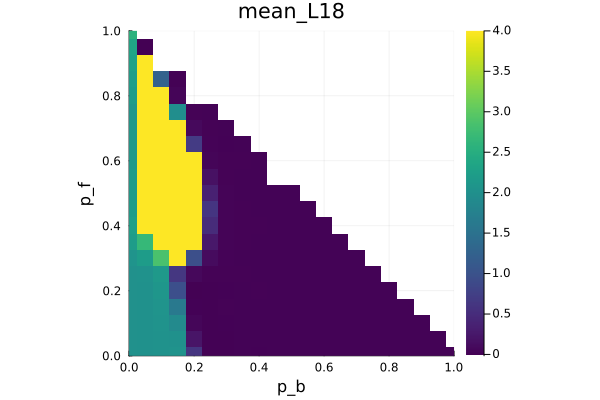

In [36]:
stat = "mean"
L = "L18"
cutoff = 4

heatmap(model_data["p_b_arr"], model_data["p_f_arr"], min.(TEE_Stats[stat][L][:, :], cutoff), xlabel="p_b", ylabel="p_f", title="$(stat)_$(L)", color=:viridis, aspect_ratio=1, xlim = (0, 1), ylim = (0, 1))



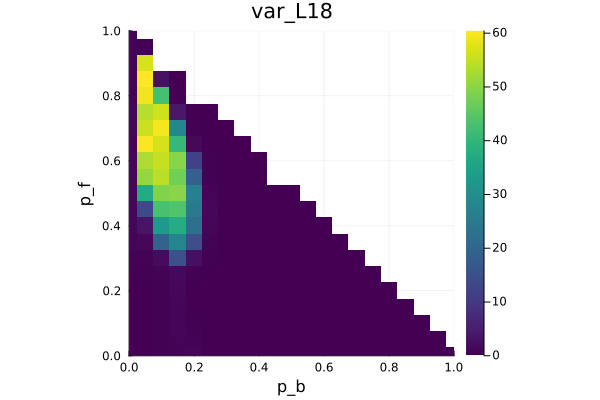

In [37]:
stat = "var"
L = "L18"

heatmap(model_data["p_b_arr"], model_data["p_f_arr"], TEE_Stats[stat][L][:, :], xlabel="p_b", ylabel="p_f", title="$(stat)_$(L)", color=:viridis, aspect_ratio=1, xlim = (0, 1), ylim = (0, 1))


## EE of the Cut

In [38]:
avr_back = 12

Observables_t_p  = []
# model_data = all_data[1]
for data in all_data
    if data["L"] == 15
        for i in 1:avr_back
            push!(Observables_t_p, data["EE_cut"][end+i-i, :, :, :])
        end
    end
end
Observables_t_p_15  = cat(dims= 4, Observables_t_p...)

Observables_t_p  = []
# model_data = all_data[1]
for data in all_data
    if data["L"] == 18
        for i in 1:avr_back
            push!(Observables_t_p, data["EE_cut"][end+i-i, :, :, :])
        end
    end
end
Observables_t_p_18  = cat(dims= 4, Observables_t_p...)

# Observables_t_p  = []
# model_data = all_data[1]
# for data in all_data
#     if data["L"] == 21
#         push!(Observables_t_p, data["EE_cut"][:, :, :, :])
#     end
# end
# Observables_t_p_21  = cat(dims= 5, Observables_t_p...)

# Observables_t_p  = []
# model_data = all_data[1]
# for data in all_data
#     if data["L"] == 24
#         push!(Observables_t_p, data["EE_cut"][:, :, :, :])
#     end
# end
# Observables_t_p_24  = cat(dims= 5, Observables_t_p...)

CUT_dict = Dict(
    "L15" => Observables_t_p_15,
    "L18" => Observables_t_p_18,
    #"L21" => Observables_t_p_21,
    #"L24" => Observables_t_p_24
)

CUT_means = Dict(
    "L15" => mean(CUT_dict["L15"], dims = 4),
    "L18" => mean(CUT_dict["L18"], dims = 4),
    #"L21" => mean(CUT_dict["L21"], dims = 5),
    #"L24" => mean(CUT_dict["L24"], dims = 5)
)

CUT_vars = Dict(
    "L15" => var(CUT_dict["L15"], dims = 4),
    "L18" => var(CUT_dict["L18"], dims = 4),
    #"L21" => var(CUT_dict["L21"], dims = 5),
    #"L24" => var(CUT_dict["L24"], dims = 5)
)

CUT_err = Dict(
    "L15" => std(CUT_dict["L15"], dims = 4) ./ sqrt(size(CUT_dict["L15"], 4)),
    "L18" => std(CUT_dict["L18"], dims = 4) ./ sqrt(size(CUT_dict["L18"], 4)),
    #"L21" => std(CUT_dict["L21"], dims = 5) ./ sqrt(size(CUT_dict["L21"], 5)),
    #"L24" => std(CUT_dict["L24"], dims = 5) ./ sqrt(size(CUT_dict["L24"], 5))
)

CUT_medians = Dict(
    "L15" => median(CUT_dict["L15"], dims = 4),
    "L18" => median(CUT_dict["L18"], dims = 4),
    #"L21" => median(CUT_dict["L21"], dims = 5),
    #"L24" => median(CUT_dict["L24"], dims = 5)
)

CUT_Stats = Dict(
    "mean" => CUT_means,
    "var" => CUT_vars,
    "err" => CUT_err,
    "median" => CUT_medians
)


Dict{String, Dict{String, Array{Float64, 4}}} with 4 entries:
  "median" => Dict("L15"=>[29.0 28.0 … 0.0 0.0; 29.0 28.0 … 0.0 NaN; … ; 25.0 1…
  "err"    => Dict("L15"=>[0.0 0.03219 … 0.0157016 0.0; 0.0163367 0.0407642 … 0…
  "mean"   => Dict("L15"=>[29.0 27.76 … 0.38 0.0; 29.0 27.74 … 0.04 NaN; … ; 24…
  "var"    => Dict("L15"=>[0.0 1.24344 … 0.295847 0.0; 0.320267 1.99406 … 0.038…

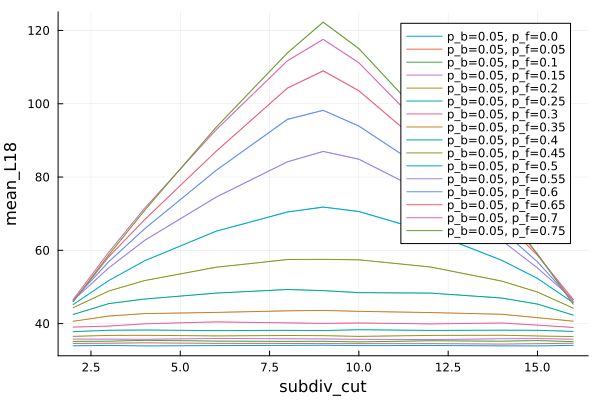

In [51]:
p_b_ind = 2
p_b = model_data["p_b_arr"][p_b_ind]
stat = "mean"
L = "L18"
ribbon = "err"

if L == "L15"
    model_data = all_data[4]
elseif L == "L18"
    model_data = all_data[1]
elseif L == "L21"
    model_data = all_data[2]
elseif L == "L24"
    model_data = all_data[3]
end

plot()

for p_f_ind = 1:16
    p_f = model_data["p_f_arr"][p_f_ind]
    plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")
end

plot!()

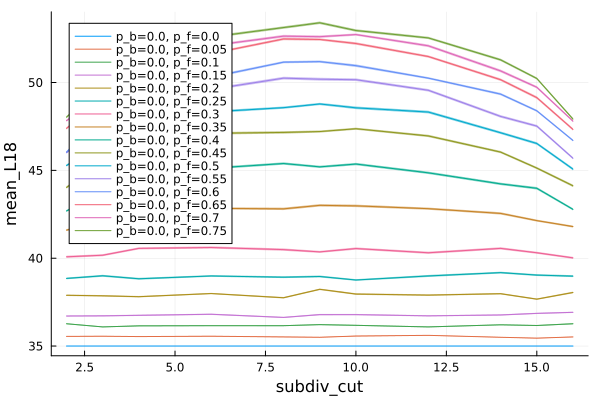

In [52]:
p_b_ind = 1
p_b = model_data["p_b_arr"][p_b_ind]
stat = "mean"
L = "L18"
ribbon = "err"

if L == "L15"
    model_data = all_data[4]
elseif L == "L18"
    model_data = all_data[1]
elseif L == "L21"
    model_data = all_data[2]
elseif L == "L24"
    model_data = all_data[3]
end

plot()

for p_f_ind = 1:16
    p_f = model_data["p_f_arr"][p_f_ind]
    plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")
end

plot!()

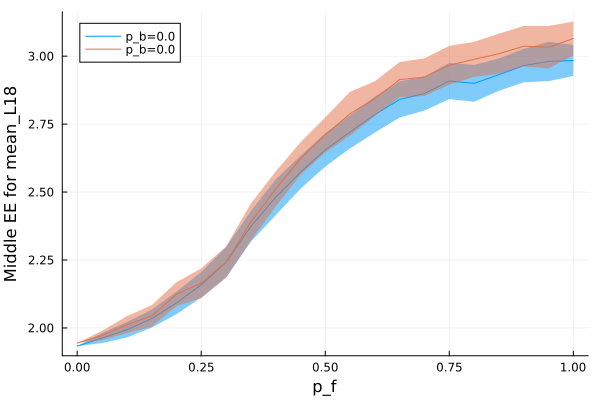

In [41]:
stat = "mean"
L = "L15"
ribbon = "err"

if L == "L15"
    model_data = all_data[4]
elseif L == "L18"
    model_data = all_data[1]
elseif L == "L21"
    model_data = all_data[2]
elseif L == "L24"
    model_data = all_data[3]
end

plot()
for p_b_ind = 1
    p_b = model_data["p_b_arr"][p_b_ind]
    plot!(model_data["p_f_arr"], CUT_Stats[stat][L][:, p_b_ind, round(Int, end/2+0.5)]/15, ribbon= CUT_Stats[ribbon][L][:, p_b_ind, round(Int, end/2+0.5)], xlabel="p_f", ylabel="Middle EE for $(stat)_$(L)", label="p_b=$(p_b)")
end


stat = "mean"
L = "L18"
ribbon = "err"

if L == "L15"
    model_data = all_data[4]
elseif L == "L18"
    model_data = all_data[1]
elseif L == "L21"
    model_data = all_data[2]
elseif L == "L24"
    model_data = all_data[3]
end


for p_b_ind = 1
    p_b = model_data["p_b_arr"][p_b_ind]
    plot!(model_data["p_f_arr"], CUT_Stats[stat][L][:, p_b_ind, round(Int, end/2+0.5)]/18, ribbon= CUT_Stats[ribbon][L][:, p_b_ind, round(Int, end/2+0.5)], xlabel="p_f", ylabel="Middle EE for $(stat)_$(L)", label="p_b=$(p_b)")
end
plot!()

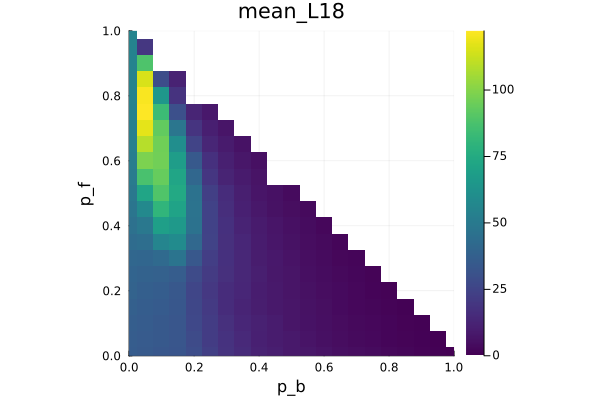

In [42]:
stat = "mean"
L = "L18"
cutoff = 10000

heatmap(model_data["p_b_arr"], model_data["p_f_arr"], min.(CUT_Stats[stat][L][:, :, round(Int, end/2+0.5)], cutoff), xlabel="p_b", ylabel="p_f", title="$(stat)_$(L)", color=:viridis, aspect_ratio=1, xlim = (0, 1), ylim = (0, 1))

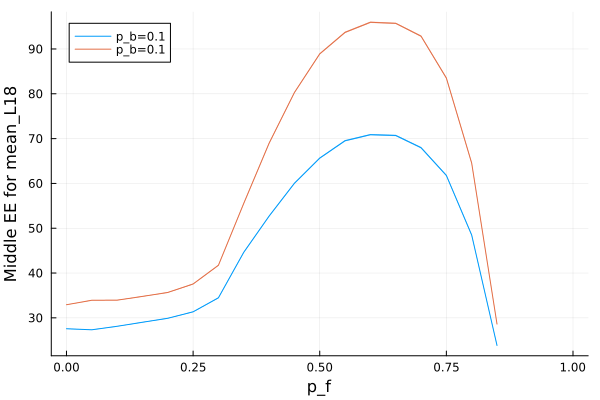

In [43]:
stat = "mean"
L = "L15"
ribbon = "err"

if L == "L15"
    model_data = all_data[4]
elseif L == "L18"
    model_data = all_data[1]
elseif L == "L21"
    model_data = all_data[2]
elseif L == "L24"
    model_data = all_data[3]
end

plot()
for p_b_ind = 3
    p_b = model_data["p_b_arr"][p_b_ind]
    plot!(model_data["p_f_arr"], CUT_Stats[stat][L][:, p_b_ind, round(Int, end/2+0.5)], ribbon= CUT_Stats[ribbon][L][:, p_b_ind, round(Int, end/2+0.5)], xlabel="p_f", ylabel="Middle EE for $(stat)_$(L)", label="p_b=$(p_b)")
end


stat = "mean"
L = "L18"
ribbon = "err"

if L == "L15"
    model_data = all_data[4]
elseif L == "L18"
    model_data = all_data[1]
elseif L == "L21"
    model_data = all_data[2]
elseif L == "L24"
    model_data = all_data[3]
end


for p_b_ind = 3
    p_b = model_data["p_b_arr"][p_b_ind]
    plot!(model_data["p_f_arr"], CUT_Stats[stat][L][:, p_b_ind, round(Int, end/2+0.5)], ribbon= CUT_Stats[ribbon][L][:, p_b_ind, round(Int, end/2+0.5)], xlabel="p_f", ylabel="Middle EE for $(stat)_$(L)", label="p_b=$(p_b)")
end
plot!()